In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Color_Transfer_CCS(source, target):
    rgb_s = np.reshape(source, (-1, 3)).T
    rgb_t = np.reshape(target, (-1, 3)).T

    mean_s = np.mean(rgb_s, axis=1)
    mean_t = np.mean(rgb_t, axis=1)

    cov_s = np.cov(rgb_s)
    cov_t = np.cov(rgb_t)

    U_s, A_s, _ = np.linalg.svd(cov_s)
    U_t, A_t, _ = np.linalg.svd(cov_t)

    rgbh_s = np.vstack((rgb_s, np.ones((1, rgb_s.shape[1]), dtype=np.float64)))

    T_t = np.eye(4, dtype=np.float64)
    T_t[:3, 3] = mean_t
    T_s = np.eye(4, dtype=np.float64)
    T_s[:3, 3] = -mean_s

    R_t = np.block([[U_t, np.zeros((3, 1), dtype=np.float64)], [np.zeros((1, 3), dtype=np.float64), 1]])
    R_s = np.block([[np.linalg.inv(U_s), np.zeros((3, 1), dtype=np.float64)], [np.zeros((1, 3), dtype=np.float64), 1]])

    A_t_sqrt = np.sqrt(A_t)
    S_t = np.diag(A_t_sqrt.tolist() + [1])
    A_s_inv_sqrt = np.power(A_s, -0.5)
    S_s = np.diag(A_s_inv_sqrt.tolist() + [1])

    rgbh_e = np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(T_t, R_t), S_t), S_s), R_s), T_s).dot(rgbh_s.astype(np.float64))
    rgb_e = rgbh_e[:3, :]

    est_im = np.reshape(rgb_e.T, source.shape)

    return est_im

# Perform color transfer using the prepared source and target images
result_image = Color_Transfer_CCS(source_image, target_image)

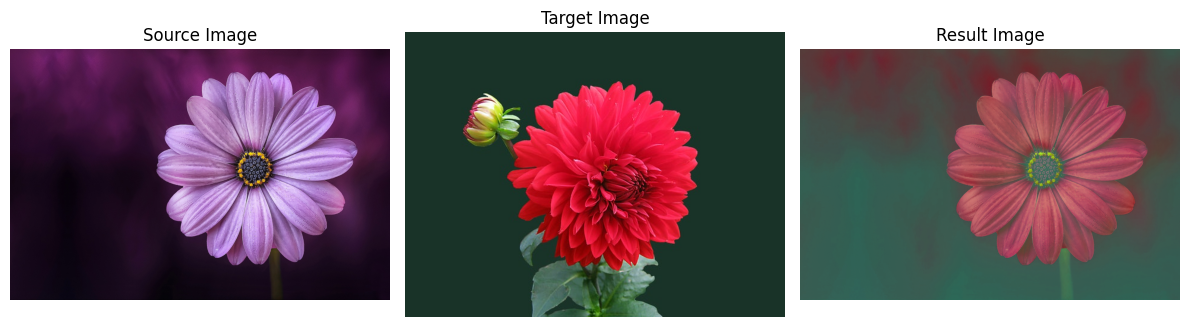

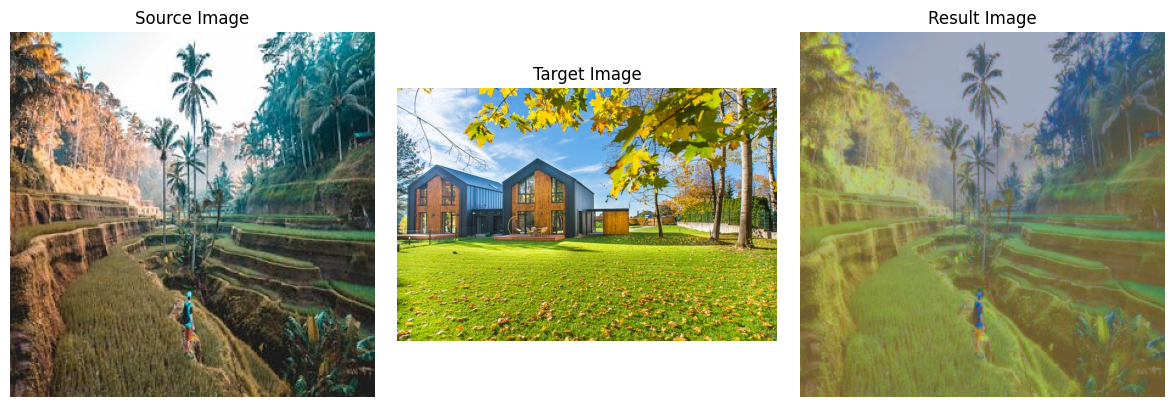

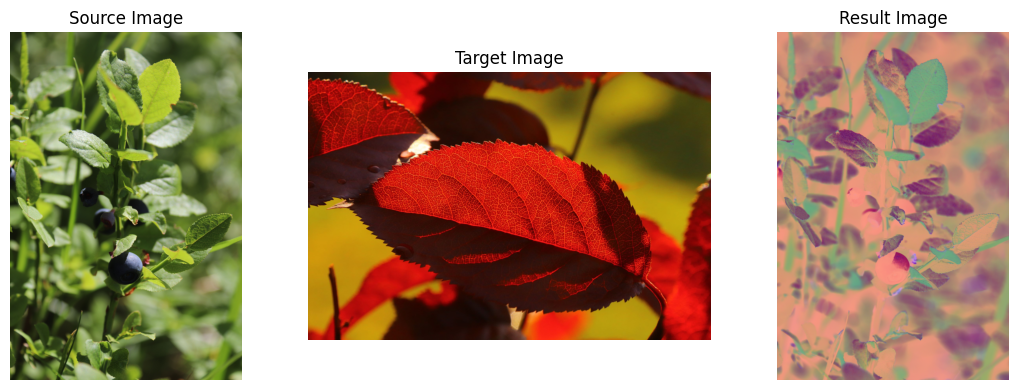

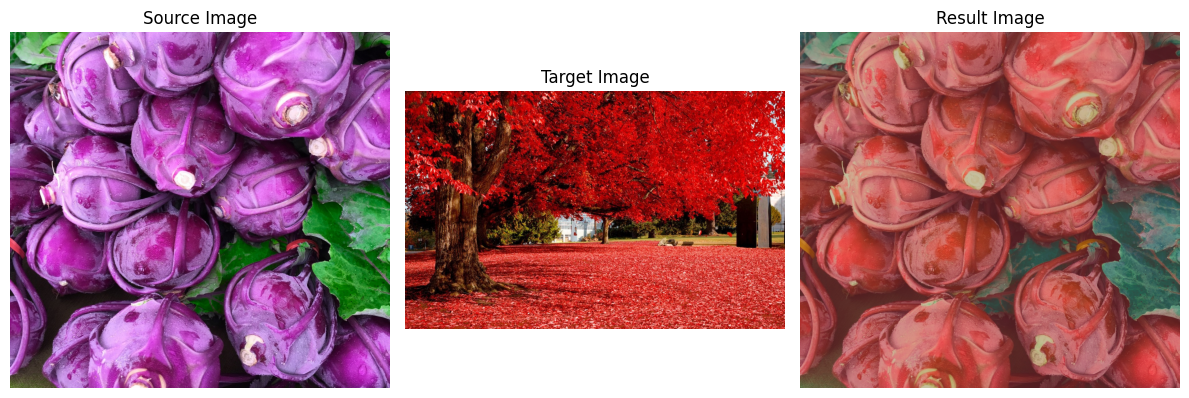

In [29]:
# Load the source, target, and resulting images
for i in range(4):
    suffix = "" if i == 0 else "_{}".format(i)
    source_image = cv2.imread("ColorTransfer-master/files/source{}.jpg".format(suffix))
    target_image = cv2.imread("ColorTransfer-master/files/target{}.jpg".format(suffix))
    result_image = Color_Transfer_CCS(source_image, target_image)

    # Convert BGR to RGB color format
    source_image = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)
    target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)

    # Rescale and clip the resulting image to the range [0, 255]
    result_image = (result_image - np.min(result_image)) / (np.max(result_image) - np.min(result_image))
    result_image = (result_image * 255).clip(0, 255).astype(np.uint8)
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    # Plot the source image
    axs[0].imshow(source_image)
    axs[0].set_title("Source Image")
    axs[0].axis("off")

    # Plot the target image
    axs[1].imshow(target_image)
    axs[1].set_title("Target Image")
    axs[1].axis("off")

    # Plot the resulting image
    axs[2].imshow(result_image)
    axs[2].set_title("Result Image")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
source_image.dtype, target_image.shape

In [ ]:


# Perform color transfer using the prepared source and target images
result_image = Color_Transfer_CCS(source_image, target_image)